# MTH9879 Homework 8

Assigned: April 4, 2017.
Due: May 2, 2017 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

* **Author: Hongchao Pan**
* Kernel Version: R 3.3.2
* Packages/Libraries: repr
* Notes:
    * Assume started price $S_0=0$ of price paths in Q3 (b)

In [1]:
# Load library
library(repr) # Change plot features

### 0. (0 points) 
Read Section 6.7 of Bouchaud, Farmer and Lillo.

## Predictability of order flow

### 1. (6 points)

Suppose that the distribution of meta order sizes $Q$ is exponential so that

$$
\Pr(Q>V)= \frac{1}{\lambda}\,e^{-\lambda\,V}
$$

Assuming slices of  constant size $\bar v$, compute the conditional probability that a hidden order has more slices given that $n$ slices have already been observed.  Compare your result with the case where distribution of metaorder size is power-law.

### Answer of Q1

Let $Q$ denote the overall sizes of metaorder with $\bar{v}$ is the constant size of slices.

- The distribution of metaorder sizes $Q$ is exponential:
$$
\begin{eqnarray*}
\text{Pr}\left(Q\ge (n+1)\bar{v}\,|\,Q\ge n\bar{v} \right) &=& \frac{\text{Pr}(Q\ge (n+1)\bar{v})}{\text{Pr}(Q\ge n\bar{v})}\\
&=& \frac{\frac{1}{\lambda}e^{-\lambda (n+1)\bar{v}}}{\frac{1}{\lambda}e^{-\lambda n\bar{v}}}\\
&=& e^{-\lambda \bar{v}}
\end{eqnarray*}
$$


- The distribution of metaorder sizes $Q$ is power-law:
$$
\begin{eqnarray*}
\Pr(T \geq (n+1)\bar{v}|T \ge n\bar{v}) &=& \frac{\Pr(T \ge (n+1)\bar{v})}{\Pr(T \ge n\bar{v})} \sim \left(\frac{n}{n+1}\right)^\beta
\end{eqnarray*}
$$
with $\beta$ is tail exponent


**Clearly, we can observe that the conditional probability with $Q$ exponential distributed is not associated with observed slices $n$. But, it is associated with $n$ if $Q$ is power-law distributed.**

## Price manipulation

### 2. (10 points)

Consider the price process

$$
S_t=S_0+\int_0^t\,f(\dot{x}_s)\,G(t-s)\,ds+\int_0^t\,\sigma\,dZ_s
$$

where ${\dot x}_s$ is the rate of trading in dollars at time $s < t$, $f(\dot{x}_s)$ represents the impact of trading at time $s$ and $G(t-s)$ is a decay factor.

(a) With the choices

$$
f(v)=\sqrt{v},\quad G(\tau)=\frac{1}{1+\tau},
$$
    
repeat the computations in Lecture 8  to derive an expression for the expected cost of accumulating shares at the rate $v_1$ and liquidating them at the rate $v_2$.

(b) Verify that with $T=1$, $v_1=1/4$, $v_2=1$, the expected cost of this round-trip strategy is negative, thus demonstrating that price manipulation is possible. (Recall from the lecture slides that price manipulation is always possible if $f(\cdot)$ is nonlinear and the decay kernel $G(\cdot)$  is finite at the origin.)

Hint: You might consider using Mathematica or Wolfram Alpha to do the integrations.

### Answer of Q2

#### Answer of (a)

* From Lecture 8, we know the expected cost is $C_{11}+C_{22}-C_{12}$, where:
$$
\begin{eqnarray*}
C_{11} &=& v_1 f(v_1)\int_0^{\theta T} \int_0^t G(t-s)dsdt\\
&=& v_1 \sqrt{v_1}\int_0^{\theta T}\int_0^t \frac{1}{1+t-s}dsdt\\
&=& v_1 \sqrt{v_1} \int_0^{\theta T}ln(t+1)dt\\
&=& v_1 \sqrt{v_1} \int_0^{\theta T}ln(t+1)d(t+1)\\
&=& v_1 \sqrt{v_1} \big[(t+1)ln(t+1)\big] \big|_0^{\theta T}\\
&=& v_1 \sqrt{v_1}\big[(\theta T+1)ln(\theta T+1)-\theta T\big]\\\\
C_{22}&=& v_2 f(v_2)\int_{\theta T}^T \int_{\theta T}^t G(t-s)dsdt\\
&=& v_2 \sqrt{v_2}\int_{\theta T}^T \int_{\theta T}^t \frac{1}{1+t-s}dsdt\\
&=& v_2 \sqrt{v_2}\int_{\theta T}^T ln(1+t-\theta T)dt\\
&=& v_2 \sqrt{v_2}\int_{\theta T}^T ln(1+t-\theta T)d(1+t-\theta T)\\
&=& v_2 \sqrt{v_2}\bigg[(t+1-\theta T)ln(t+1-\theta T)\big|_{\theta T}^T -\int_{\theta T}^T dt\bigg]\\
&=& v_2 \sqrt{v_2}(T+1-\theta T)ln(T+1-\theta T)-(T-\theta T)\\\\
C_{12} &=& v_2 f(v_1)\int_{\theta T}^T \int_0^{\theta T} G(t-s)dsdt\\
&=& v_2 \sqrt{v_1}\int_{\theta T}^T \big[-ln(1+t-s)\big|_0^{\theta T}dt\\
&=& v_2 \sqrt{v_1}\int_{\theta T}^T \big[(ln(t+1)-ln(t+1-\theta T)\big] dt\\
&=& v_2 \sqrt{v_1}\bigg[ \int_{\theta T}^T ln(t+1) d(t+1) -\int_{\theta T}^T ln(t+1-\theta T) d(t+1-\theta T) \bigg]\\
&=& v_2 \sqrt{v_1} \big[(T+1)ln(T+1)-(\theta T+1)ln(\theta T+1)-(T+1-\theta T) ln(T+1-\theta T)\big]\\
\end{eqnarray*}
$$


* Therefore the expected cost is:
$$
\begin{eqnarray*}
C_{11}+C_{22}-C_{12} &=& v_1 \sqrt{v_1}\big[(\theta T+1)ln(\theta T+1)-\theta T\big] \\
&&+ v_2 \sqrt{v_2}\bigg[(t+1-\theta T)ln(t+1-\theta T)\big|_{\theta T}^T -\int_{\theta T}^T dt\bigg]\\
&&- v_2 \sqrt{v_1} \big[(T+1)ln(T+1)-(\theta T+1)ln(\theta T+1)-(T+1-\theta T) ln(T+1-\theta T)\big]\\
\end{eqnarray*} 
$$

#### Answer of (b): Verify the expected cost is negative with given conditions

In [2]:
# Compute the expected cost with given conditions
T<- 1
v1<- 1/4
v2<- 1
theta<- v2/(v1+v2)

# Compute each items by using closed formulas just derived in (a)
C11<- v1*sqrt(v1)*((theta*T+1)*log(theta*T+1)-theta*T)
C22<- v2*sqrt(v2)*((T+1-theta*T)*log(T+1-theta*T)-(T-theta*T))
C12<- v2*sqrt(v1)*((T+1)*log(T+1)-(1+theta*T)*log(1+theta*T)-(T+1-theta*T)*log(T+1-theta*T))
C<- C11+C22-C12

cat("The expected cost C with given conditions is: ",round(C,digits = 9))

The expected cost C with given conditions is:  -0.00370838

* The expected cost $C$ is negative with given conditions, which implies price manipulation is possible.

## The Obizhaeva-Wang model

### 3. (8 points)

In the Obizhaeva Wang (OW) model, the price follows

$$
S_t=S_0+\eta\,\int_0^t\,{\dot x}_s\,e^{-\rho\,(t-s)}\,ds+\int_0^t\,\sigma\,dZ_s
$$

(a) Derive an expression for the expected price path corresponding to a VWAP execution.

(b) With the duration $T$ of the meta order set to 1, plot the expected price path from time $t=0$ to time $t=2$ for $\rho=0.5,1,$ and $2$.

(c) What is the expected average cost per share $\bar S_T$ of a VWAP order in the OW model?

### Answer of Q3

#### Answer of (a): VWAP

* From Lecture 8, we know:
$${\dot x}_t =v=\left \{ \begin{array}{rcl}
 \frac{n}{T} & \mbox{for} & t\le T \\ 
0 & \mbox{for} & t>T 
\end{array}\right.  
$$
where $n$ is total shares


* Therefore, if $t \le T$, we have:
$$
\begin{eqnarray*}
\mathbb{E}(S_t)&=&S_0+\eta \int_0^t\frac{n}{T}e^{-\rho(t-s)}ds \\
&=& S_0+ \frac{\eta n}{\rho T} e^{-\rho (t-s)}\big|_0^t\\
&=& S_0+ \frac{\eta n}{\rho T} \left(1-e^{-\rho t}\right)
\end{eqnarray*}
$$


* if $t\ge T$, we have:
$$
\begin{eqnarray*}
\mathbb{E}(S_t)&=&S_0+\eta \int_0^T\frac{n}{T}e^{-\rho(t-s)}ds +0 \\
&=& S_0+ \frac{\eta n}{\rho T} e^{-\rho (t-s)}\big|_0^T\\
&=& S_0+ \frac{\eta n}{\rho T} \left(e^{-\rho (t-T)}-e^{-\rho t}\right)
\end{eqnarray*}
$$

#### Answer of (b): Plots

In [3]:
# Given conditions
T<- 1  # duration
ts<- 0 # start point
te<- 2 # end point
rho1<- 0.5
rho2<- 1
rho3<- 2

# Assumed parameters (not given)
S0<- 0
# Assume the constant terms to be 1
eta<- 1
n<- 1

# Define expected price function
price_path<- function(t, rho){
    if(t>T){
        St<- S0+eta*n*(exp(-rho*(t-T))-exp(-rho*t))/(rho*T)
    }
    else{
        # Assume t is non-negative
        St<- S0+ eta*n*(1-exp(-rho*t))/(rho*T)
    }
    return (St)
}

timeSteps<- seq(0,2, 0.001)

# Compute 3 price paths
St1<- sapply(timeSteps, function(t){price_path(t,rho1)})
St2<- sapply(timeSteps, function(t){price_path(t,rho2)})
St3<- sapply(timeSteps, function(t){price_path(t,rho3)})

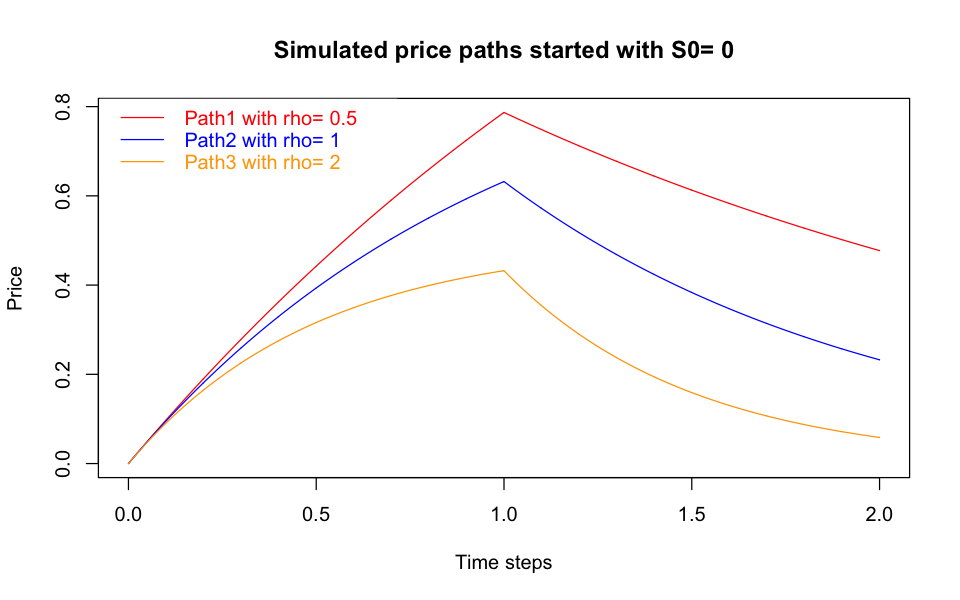

In [4]:
# Plot the price paths
options(repr.plot.height=5, repr.plot.width=8)
# Path1
plot(timeSteps,St1,xlab='Time steps',ylab = 'Price',type = 'l',col='red',
    main=paste('Simulated price paths started with S0=',S0))
# Path2
lines(timeSteps,St2,type='l',col='blue')
lines(timeSteps,St3,type = 'l',col='orange')
legend('topleft',c(paste("Path1 with rho=",rho1),paste("Path2 with rho=",rho2),
                  paste("Path3 with rho=",rho3)),lty=c(1,1,1),col=c('red','blue','orange'),
      text.col=c('red','blue','orange'),y.intersp=1.5,cex=1, inset=0.002,box.col='white')

Figure 1. Simulated price paths with various $\rho$

#### Answer of (c): expected average cost per share $\bar S_T$

* Since $\bar S_T$ is expected average cost per share. Denote $v=n/T$ is the constant execution rate per unit time. Then $vT$ is the total shares during whole time $T$. With $t\le T$ $\rightarrow$ $\mathbb{E}(S_t)=S_0+ \frac{\eta v}{\rho } \left(1-e^{-\rho t}\right)$, according to the definition of $\bar{S_t}$, we have:
$$
\begin{eqnarray*}
\bar{S_T} &=& \mathbb{E}\left(\frac{\int_0^T vS_tdt}{vT}\right)\\
&=& \frac{v\int_0^T \mathbb{E}(S_t)dt}{vT}\\
&=& \frac{\int_0^T \left(S_0+ \frac{\eta v}{\rho } \left(1-e^{-\rho t}\right)\right)dt}{T}\\
&=& S_0 + \frac{\frac{\eta v}{\rho}\left( T + \frac{1}{\rho}e^{-\rho t}\big|_0^T\right)}{T}\\
&=& S_0 + \frac{\eta v}{\rho}\left(1+\frac{1}{\rho T}\left(e^{-\rho T}-1\right)\right)
\end{eqnarray*}
$$